In [2]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [4]:
# Aggregate weekly sales
df = pd.read_csv("./../datasets/train.csv", parse_dates=["Date"])
sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()

# Prophet expects: ds (date), y (value)
sales = sales.rename(columns={"Date": "ds", "Weekly_Sales": "y"})
print(sales.head())

          ds            y
0 2010-02-05  49750740.50
1 2010-02-12  48336677.63
2 2010-02-19  48276993.78
3 2010-02-26  43968571.13
4 2010-03-05  46871470.30


In [5]:
# Initialize Prophet model
model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)

# Add US holidays (Walmart sales are highly holiday-driven)
model.add_country_holidays(country_name='US')

# Fit model
model.fit(sales)


21:30:26 - cmdstanpy - INFO - Chain [1] start processing
21:30:26 - cmdstanpy - INFO - Chain [1] done processing


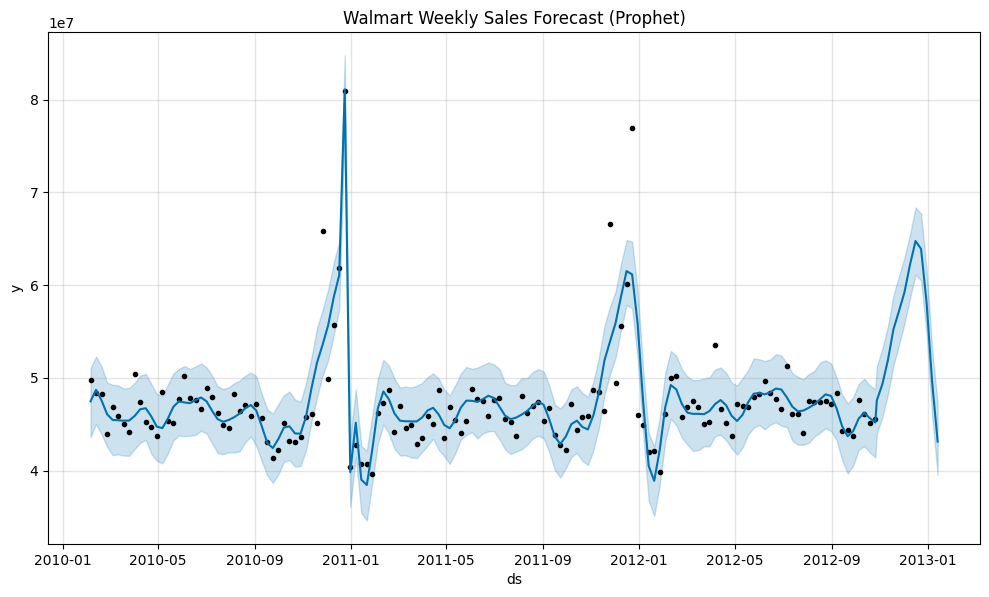

In [6]:
# Forecast 12 weeks ahead
future = model.make_future_dataframe(periods=12, freq="W")
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title("Walmart Weekly Sales Forecast (Prophet)")
plt.show()

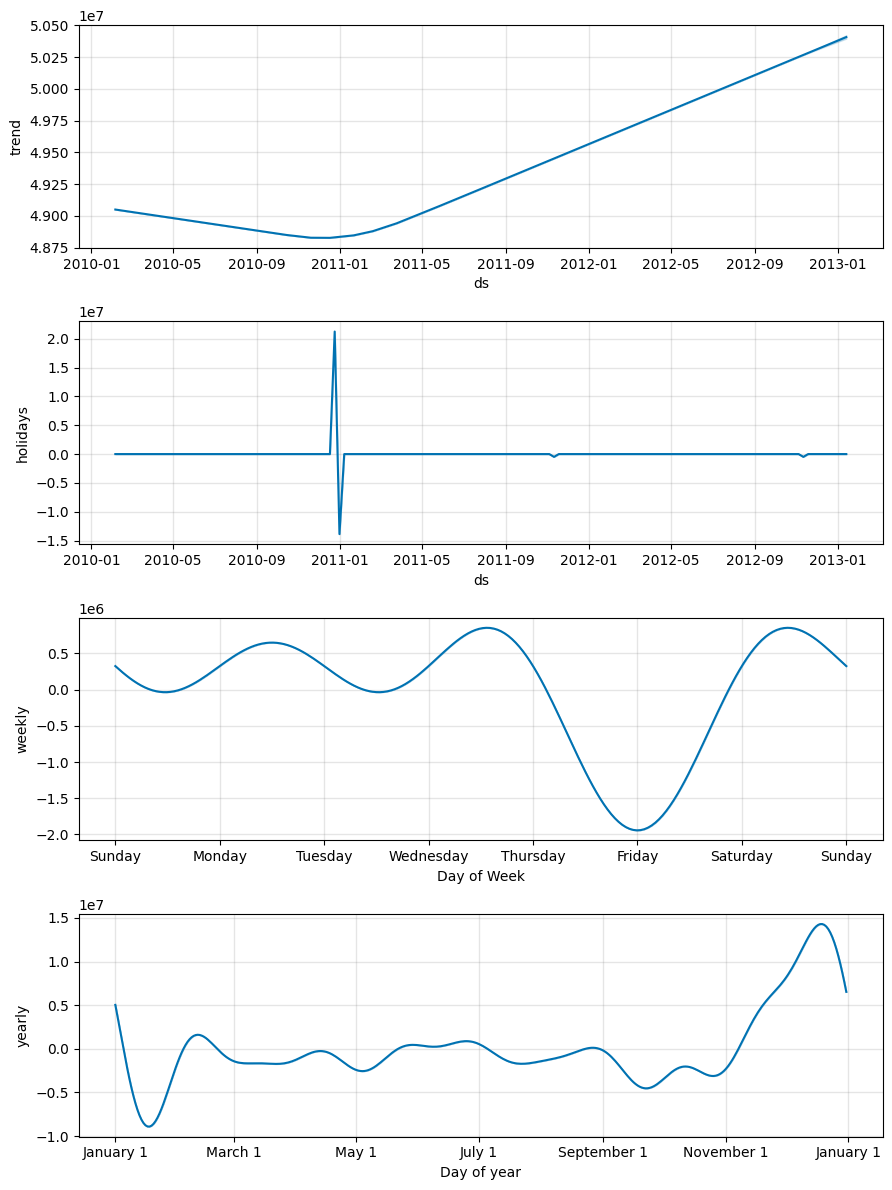

In [7]:
fig2 = model.plot_components(forecast)
plt.show()